In [45]:
import warnings
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score

from IPython.core.display import display, HTML
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
warnings.filterwarnings('ignore')
iris  =load_iris()

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
target = iris['target']
target[:5]

array([0, 0, 0, 0, 0])

In [6]:
feature_names = iris['feature_names']
feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris['data'],
                  columns=iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
df['target'] = target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


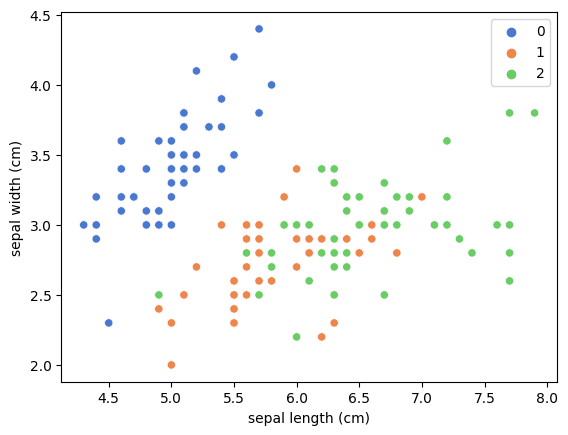

In [16]:
sns.scatterplot(x='sepal length (cm)',
                y='sepal width (cm)',
                hue=target,
                palette='muted',
                data=df)
plt.show()

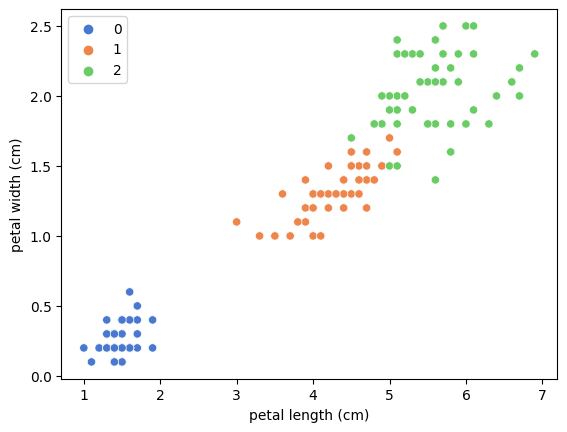

In [17]:
sns.scatterplot(x='petal length (cm)',
                y='petal width (cm)',
                hue=target,
                palette='muted',
                data=df)
plt.show()

In [23]:
X_train, X_valid, y_train, y_valid = train_test_split(df.drop('target', axis=1),
                                                      df['target'],
                                                      test_size=0.2,
                                                      random_state=42)

In [24]:
X_train.shape, y_train.shape

((120, 4), (120,))

In [25]:
X_valid.shape, y_valid.shape

((30, 4), (30,))

In [29]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 120 entries, 22 to 102
Series name: target
Non-Null Count  Dtype
--------------  -----
120 non-null    int64
dtypes: int64(1)
memory usage: 5.9 KB


<Axes: ylabel='count'>

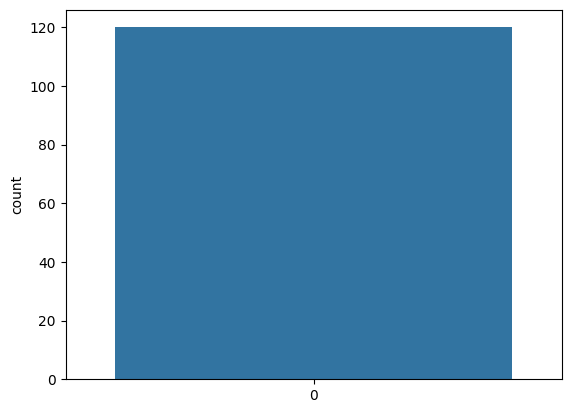

In [35]:
sns.countplot(y_train)

In [37]:
# 1~26 까지 설정
k_range = range(1,26)
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_valid)
    scores[k] = metrics.accuracy_score(y_valid,y_pred)
    print('k is %d, score is %f' %(k, scores[k]))
    score_list.append(metrics.accuracy_score(y_valid,y_pred))

k is 1, score is 1.000000
k is 2, score is 1.000000
k is 3, score is 1.000000
k is 4, score is 1.000000
k is 5, score is 1.000000
k is 6, score is 1.000000
k is 7, score is 0.966667
k is 8, score is 1.000000
k is 9, score is 1.000000
k is 10, score is 1.000000
k is 11, score is 1.000000
k is 12, score is 1.000000
k is 13, score is 1.000000
k is 14, score is 1.000000
k is 15, score is 1.000000
k is 16, score is 1.000000
k is 17, score is 1.000000
k is 18, score is 1.000000
k is 19, score is 1.000000
k is 20, score is 1.000000
k is 21, score is 1.000000
k is 22, score is 1.000000
k is 23, score is 1.000000
k is 24, score is 1.000000
k is 25, score is 1.000000


Text(0, 0.5, 'Testing Accuracy')

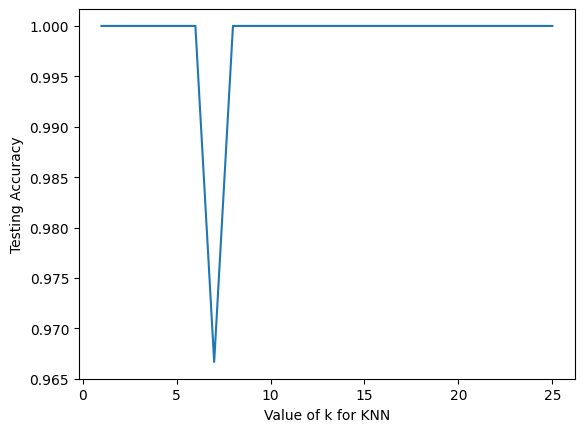

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(k_range,score_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')

In [40]:
model = KNeighborsClassifier()
model.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [41]:
model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
y_pred = model.predict(X_valid)
y_pred[:5]

array([1, 0, 2, 1, 1])

In [44]:
print('accuracy: %.2f' % accuracy_score(y_valid, y_pred))

accuracy: 1.00


In [47]:
pickle.dump(model, open('../data/iris_prediction.pickle','wb'))